# Task: Customer Preference Analysis

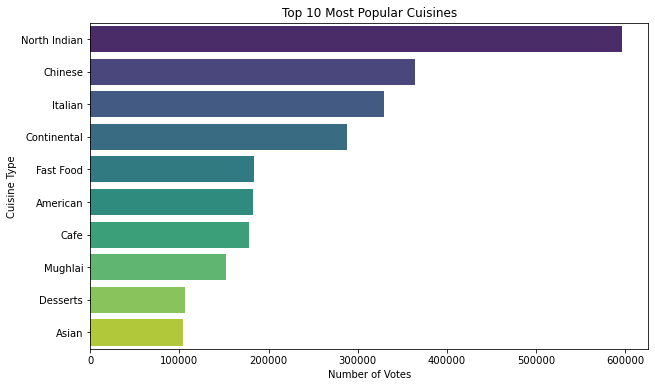

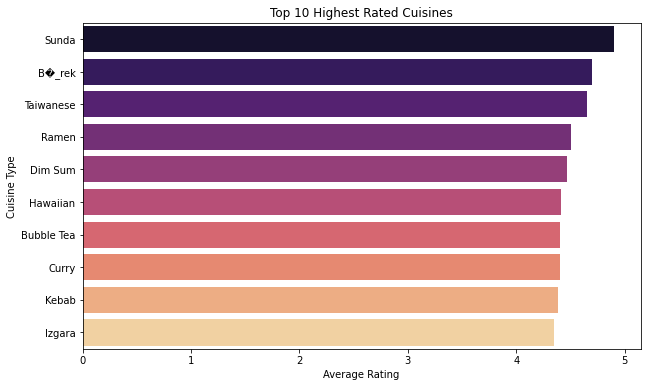

Most Popular Cuisines Based on Votes:
          Cuisines  Aggregate rating   Votes
100  North Indian          2.510455  595981
34        Chinese          2.621024  364351
70        Italian          3.562042  329265
37    Continental          3.518750  288255
49      Fast Food          2.563092  184058
2        American          3.661538  183117
27           Cafe          3.321195  177568
95        Mughlai          2.609950  151946
42       Desserts          2.978867  105889
7           Asian          3.815021  104303

Cuisines with the Highest Average Ratings:
        Cuisines  Aggregate rating  Votes
130       Sunda          4.900000   5514
26       B�_rek          4.700000   1305
132   Taiwanese          4.650000    384
112       Ramen          4.500000   1259
43      Dim Sum          4.466667   1755
61     Hawaiian          4.412500   8012
23   Bubble Tea          4.400000    659
40        Curry          4.400000   2059
75        Kebab          4.380000   1536
71       Izgara       

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\91702\Dataset.csv' 
df = pd.read_csv(file_path)

# Split the 'Cuisines' column to handle multiple cuisines listed for a restaurant
df['Cuisines'] = df['Cuisines'].str.split(', ')

# Explode the 'Cuisines' column so that each cuisine type is in a separate row
df_exploded = df.explode('Cuisines')

# Group by 'Cuisines' to find the average rating and total votes for each cuisine
cuisine_rating_votes = df_exploded.groupby('Cuisines').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).reset_index()

# Filter out cuisines with fewer than 100 votes to ensure statistical significance
filtered_cuisines = cuisine_rating_votes[cuisine_rating_votes['Votes'] > 100]

# Sort cuisines by the number of votes to identify the most popular cuisines
most_popular_cuisines = filtered_cuisines.sort_values(by='Votes', ascending=False)

# Sort cuisines by average rating to identify cuisines with higher ratings
highest_rated_cuisines = filtered_cuisines.sort_values(by='Aggregate rating', ascending=False)

# Visualization of Most Popular Cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x='Votes', y='Cuisines', data=most_popular_cuisines.head(10), palette='viridis')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Number of Votes')
plt.ylabel('Cuisine Type')
plt.show()

# Visualization of Highest Rated Cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x='Aggregate rating', y='Cuisines', data=highest_rated_cuisines.head(10), palette='magma')
plt.title('Top 10 Highest Rated Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.show()

# Display the results
print("Most Popular Cuisines Based on Votes:\n", most_popular_cuisines.head(10))
print("\nCuisines with the Highest Average Ratings:\n", highest_rated_cuisines.head(10))
